# Pizza Brands Engagement Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [6]:
pizza = pd.read_csv('pizza_3_brands.csv')

In [7]:
print(pizza.head())

                      Account  \
0      thepizzacompany_lomsak   
1  thepizzacompany_phetchabun   
2                     UNKNOWN   
3            ชอบโปร - ShobPro   
4           E-League Thailand   

                                             Message     Source   post date  \
0  บุญใหญ่แห่งปี…กฐินบ้านเฮา  ทำบุญกฐินปีนี้ ให้พ...  instagram  2023-11-01   
1  บุญใหญ่แห่งปี…กฐินบ้านเฮา  ทำบุญกฐินปีนี้ ให้พ...  instagram  2023-11-01   
2  หลอนสิ โดนคุ๊กกี้เฮอชี่ เข้าไปคำเดียว หวานจนพร...   facebook  2023-11-01   
3   สั่งเลย! พิซซ่าหน้าเหลี่ยม ทุกถาด 159 บาท  🥳 ...   facebook  2023-11-01   
4  เหลือเวลาอีก 24 ชั่วโมงสุดท้ายของ Ranking Even...   facebook  2023-11-01   

  post time  time cate.   post day  Engagement  \
0   2:56:34  Night time  Wednesday           1   
1   2:58:22  Night time  Wednesday           0   
2   7:46:25    Day time  Wednesday           0   
3   8:28:02    Day time  Wednesday        1442   
4   8:59:02    Day time  Wednesday          68   

                      Mai

In [8]:
print(pizza.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account          2273 non-null   object
 1   Message          2274 non-null   object
 2   Source           2274 non-null   object
 3   post date        2274 non-null   object
 4   post time        2274 non-null   object
 5   time cate.       2274 non-null   object
 6   post day         2274 non-null   object
 7   Engagement       2274 non-null   int64 
 8   Main keyword     2274 non-null   object
 9   Follower count   2274 non-null   object
 10  Sentiment        2274 non-null   object
 11  Category         2274 non-null   object
 12  _id              2274 non-null   object
 13  Image labels     2274 non-null   object
 14  Logo detections  2274 non-null   object
dtypes: int64(1), object(14)
memory usage: 266.6+ KB
None


In [9]:
print(pizza.describe())

          Engagement
count    2274.000000
mean     1124.653914
std      7084.373012
min         0.000000
25%         2.000000
50%        16.000000
75%       151.000000
max    180670.000000


In [10]:
pizza['Follower count'] = pizza['Follower count'].replace(',', '', regex=True)  # Remove commas
pizza['Follower count'] = pd.to_numeric(pizza['Follower count'], errors='coerce')  # Convert to numeric
pizza['Follower count'] = pizza['Follower count'].fillna(0).astype(int)

In [11]:
print(pizza['Follower count'].dtype)

int64


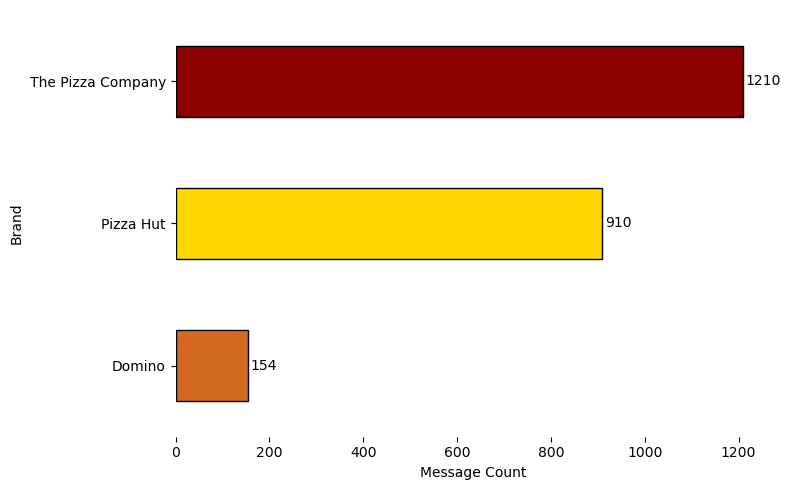

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Explicitly set a font family to avoid errors
rcParams['font.family'] = 'DejaVu Sans'  # Default font for Matplotlib

# Group by "Category" to count the number of messages per brand
brand_message_count = pizza.groupby('Category')['Message'].count()

# Define pizza-themed colors
pizza_colors = ['#D2691E', '#FFD700', '#8B0000']  # Brown, gold, and red

# Plot a minimal horizontal bar chart
plt.figure(figsize=(8, 5))
brand_message_count.plot(kind='barh', color=pizza_colors, edgecolor='black')

# Add chart title and axis labels
plt.xlabel('Message Count', fontsize=10)
plt.ylabel('Brand', fontsize=10)

# Remove chart borders for minimal style
plt.box(False)

# Add value labels on the bars
for index, value in enumerate(brand_message_count):
    plt.text(value + 5, index, str(value), va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

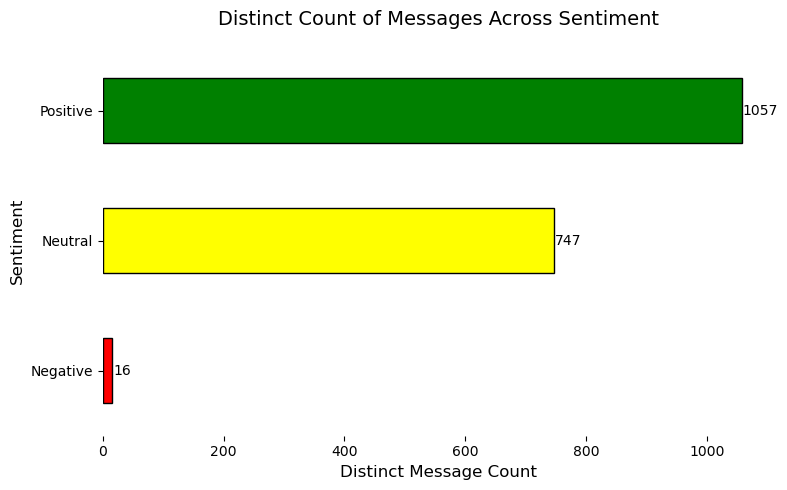

In [13]:
# Count the distinct number of messages for each sentiment
sentiment_message_count = pizza.groupby('Sentiment')['Message'].nunique()

# Define pizza-themed colors for the chart
pizza_colors = ['Red', 'Yellow', 'Green']  

# Plot a minimal horizontal bar chart
plt.figure(figsize=(8, 5))
sentiment_message_count.plot(kind='barh', color=pizza_colors, edgecolor='black')

# Add chart title and axis labels
plt.title('Distinct Count of Messages Across Sentiment', fontsize=14, pad=15)
plt.xlabel('Distinct Message Count', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

# Remove chart borders for minimal style
plt.box(False)

# Add value labels on the bars
for index, value in enumerate(sentiment_message_count):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

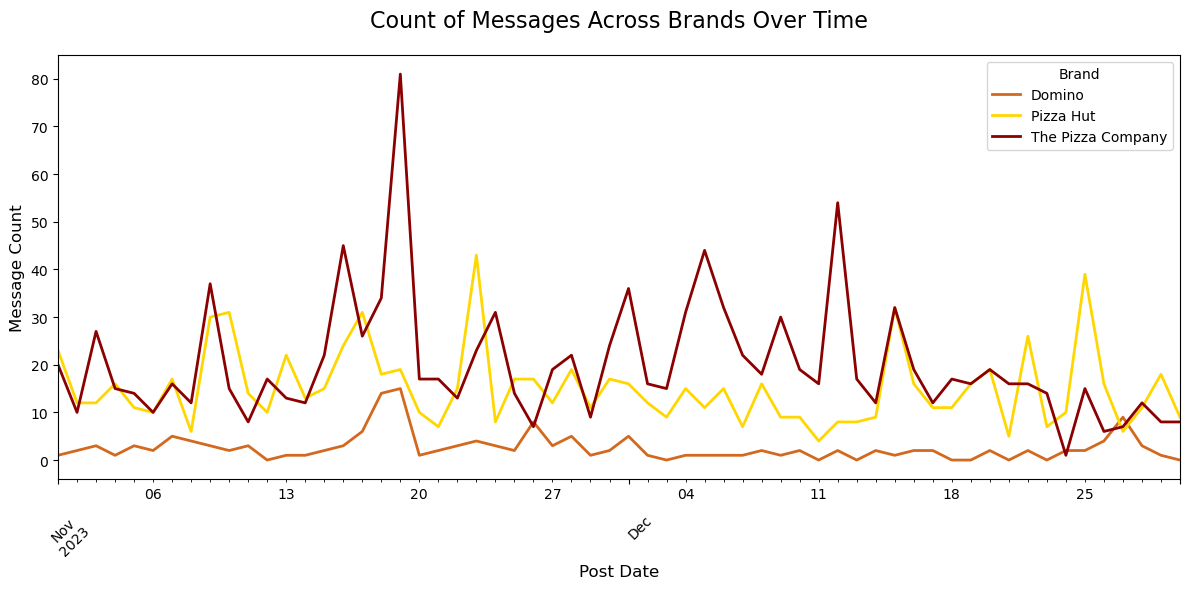

In [14]:
# Convert "post date" to datetime for proper time series plotting
pizza['post date'] = pd.to_datetime(pizza['post date'])

# Group data by "post date" and "Category" to count messages per day for each brand
time_series_data = pizza.groupby(['post date', 'Category'])['Message'].count().unstack()

# Resample data to ensure continuity by filling in missing dates (use daily frequency)
time_series_data = time_series_data.resample('D').sum().fillna(0)

# Define pizza-themed colors
pizza_colors = ['#D2691E', '#FFD700', '#8B0000']  # Brown, gold, and red

# Plot smooth line chart for time series comparison
plt.figure(figsize=(12, 6))
time_series_data.plot(ax=plt.gca(), color=pizza_colors, linewidth=2)

# Add chart title and axis labels
plt.title('Count of Messages Across Brands Over Time', fontsize=16, pad=20)
plt.xlabel('Post Date', fontsize=12)
plt.ylabel('Message Count', fontsize=12)

# Add legend and grid for clarity
plt.legend(title='Brand', fontsize=10)
plt.grid(axis='y', linestyle='None', alpha=0.7)

# Adjust x-axis for better date visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

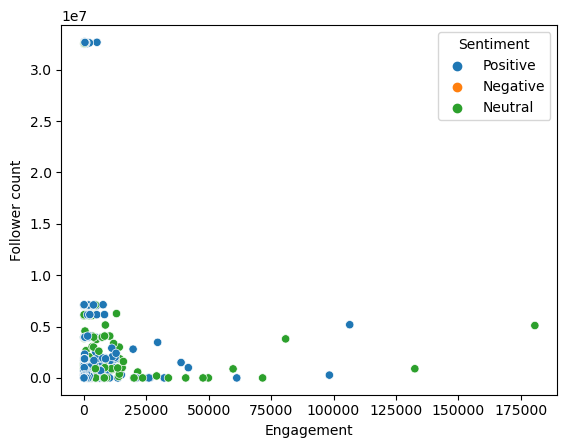

In [15]:
sns.scatterplot(data=pizza, x='Engagement', y='Follower count', hue='Sentiment')
plt.show()

In [16]:
# Calculate Q1, Q3, and IQR
Q1 = pizza['Follower count'].quantile(0.25)  # First quartile (25th percentile)
Q3 = pizza['Follower count'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pizza_no_outliers = pizza[(pizza['Follower count'] >= lower_bound) & (pizza['Follower count'] <= upper_bound)]
outliers_removed = len(pizza) - len(pizza_no_outliers)
print(f"Outliers removed: {outliers_removed}")

Outliers removed: 461


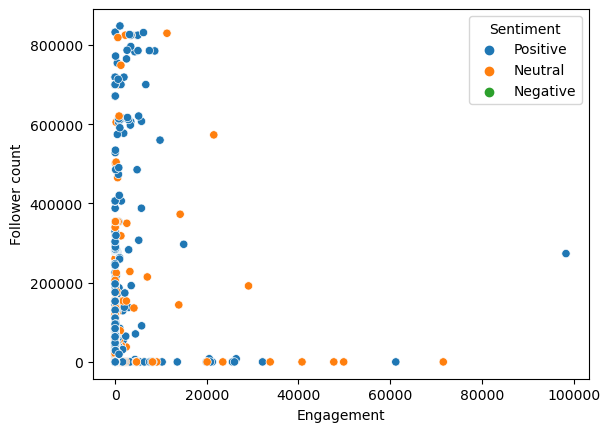

In [17]:
sns.scatterplot(data=pizza_no_outliers, x='Engagement', y='Follower count', hue='Sentiment')
plt.show()

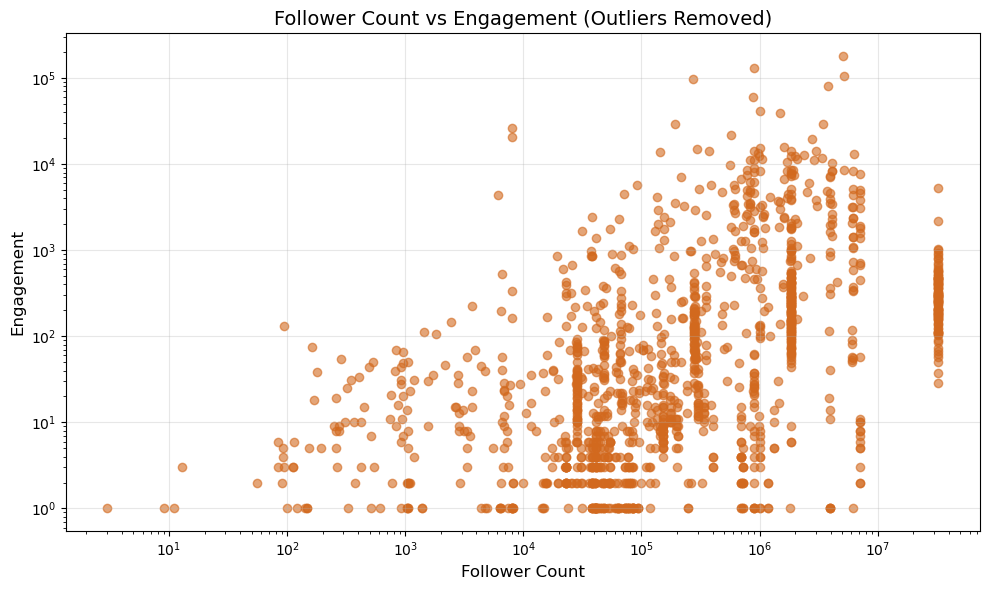

In [18]:
# Remove entries with missing or invalid follower or engagement data
pizza_cleaned = pizza[(pizza['Follower count'] > 0) & (pizza['Engagement'] >= 0)]

# Define outlier thresholds
follower_threshold = pizza_cleaned['Follower count'].quantile(0.95)  # Top 5% followers
engagement_threshold = pizza_cleaned['Engagement'].quantile(0.25)    # Bottom 25% engagement

# Filter out high-follower, low-engagement outliers
filtered_data = pizza_cleaned[
    ~((pizza_cleaned['Follower count'] > follower_threshold) & 
      (pizza_cleaned['Engagement'] < engagement_threshold))
]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Follower count'], filtered_data['Engagement'], alpha=0.6, color='#D2691E')

# Add chart title and axis labels
plt.title('Follower Count vs Engagement (Outliers Removed)', fontsize=14)
plt.xlabel('Follower Count', fontsize=12)
plt.ylabel('Engagement', fontsize=12)

# Add grid and show the plot
plt.grid(alpha=0.3)
plt.xscale('log')  # Optional: Log scale for better visualization of wide ranges
plt.yscale('log')  # Optional: Log scale for engagement too
plt.tight_layout()
plt.show()


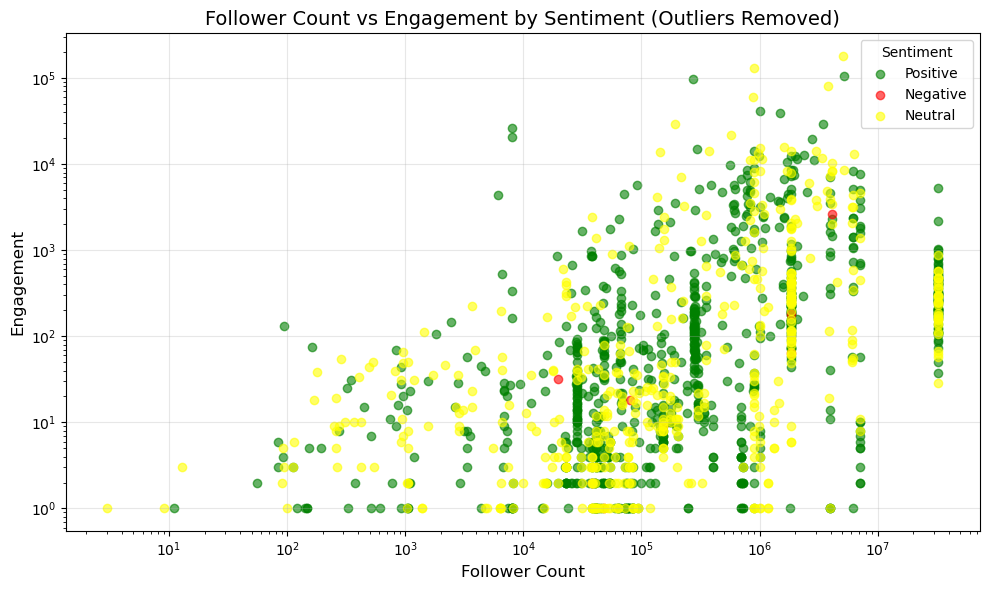

In [19]:
# Define colors for each sentiment
sentiment_colors = {
    'Positive': 'Green',  # Gold
    'Negative': 'Red',  # Dark red
    'Neutral': 'Yellow'    # Brown
}

# Safely assign colors based on sentiment
filtered_data = filtered_data.copy()  # Create a copy to avoid SettingWithCopyWarning
filtered_data.loc[:, 'Sentiment Color'] = filtered_data['Sentiment'].map(sentiment_colors)

# Plot scatter plot with sentiment-based colors
plt.figure(figsize=(10, 6))
for sentiment, color in sentiment_colors.items():
    sentiment_data = filtered_data[filtered_data['Sentiment'] == sentiment]
    plt.scatter(
        sentiment_data['Follower count'], 
        sentiment_data['Engagement'], 
        label=sentiment, 
        alpha=0.6, 
        color=color
    )

# Add chart title and axis labels
plt.title('Follower Count vs Engagement by Sentiment (Outliers Removed)', fontsize=14)
plt.xlabel('Follower Count', fontsize=12)
plt.ylabel('Engagement', fontsize=12)

# Add legend and grid
plt.legend(title='Sentiment', fontsize=10)
plt.grid(alpha=0.3)

# Optional: Log scale for better visualization of wide ranges
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Filter the data to only include negative sentiment
negative_sentiment_data = filtered_data[filtered_data['Sentiment'] == 'Negative']

# Group the negative sentiment data by 'Category' (brand) and 'Source' to count messages
negative_sentiment_analysis = negative_sentiment_data.groupby(['Category', 'Source'])['Message'].count().reset_index()

# Add the original messages to the table (optional: aggregate them into a list for readability)
negative_sentiment_analysis_with_messages = negative_sentiment_data.groupby(['Category', 'Source'])['Message'].apply(list).reset_index()

# Merge the counts and the messages
negative_sentiment_analysis = pd.merge(
    negative_sentiment_analysis,
    negative_sentiment_analysis_with_messages,
    on=['Category', 'Source']
)

# Rename columns for clarity
negative_sentiment_analysis.columns = ['Brand', 'Source', 'Negative Message Count', 'Messages']

# Sort the data for better readability
negative_sentiment_analysis = negative_sentiment_analysis.sort_values(by=['Brand', 'Negative Message Count'], ascending=[True, False])

# Display the data in tabular format
negative_sentiment_analysis

,Brand,Source,Negative Message Count,Messages
0,Pizza Hut,facebook,2,[ถ้าพลาดโปรนี้คือร้องไห้!! Pizza Hut โปรใหม่ ด...
1,The Pizza Company,facebook,6,[ฮาโลวีนปีนี้ผีไม่กลัว แต่กลัวหิวมากกว่า แบบน...


In [21]:
# Filter the data to only include positive sentiment
positive_sentiment_data = filtered_data[filtered_data['Sentiment'] == 'Positive']

# Group the positive sentiment data by 'Category' (brand) and 'Source' to count messages
positive_sentiment_analysis = positive_sentiment_data.groupby(['Category', 'Source'])['Message'].count().reset_index()

# Add the original messages to the table (aggregate them into a list for readability)
positive_sentiment_analysis_with_messages = positive_sentiment_data.groupby(['Category', 'Source'])['Message'].apply(list).reset_index()

# Merge the counts and the messages
positive_sentiment_analysis = pd.merge(
    positive_sentiment_analysis,
    positive_sentiment_analysis_with_messages,
    on=['Category', 'Source']
)

# Rename columns for clarity
positive_sentiment_analysis.columns = ['Brand', 'Source', 'Positive Message Count', 'Messages']

# Sort the data for better readability
positive_sentiment_analysis = positive_sentiment_analysis.sort_values(by=['Brand', 'Positive Message Count'], ascending=[True, False])

# Display the resulting table for review
positive_sentiment_analysis

,Brand,Source,Positive Message Count,Messages
0,Domino,facebook,79,[เหลือเวลาอีก 24 ชั่วโมงสุดท้ายของ Ranking Eve...
2,Domino,tiktok,13,[อร่อยจนลืมกรี๊ด...ต้อง Domino’s Pizza เท่านั้...
3,Domino,youtube,9,[จากปกเกม Pes สู่ปก eFootball กับเรื่องราวที...
1,Domino,instagram,6,[เติมพลังวันชอป ไปกับพิซซ่าโดมิโน่ส์ 11.11 ...
4,Pizza Hut,facebook,260,[สั่งเลย Pizza Hut ส่งฟรี Delivery วันเดียวเท่...
5,Pizza Hut,instagram,80,[ กลับมาแล้วโปรคุ้มที่รอคอย!! Pizza Hut ซื้อพี...
6,Pizza Hut,tiktok,29,[บุฟเฟ่พิซซ่าฮัทคุ้มมั้ย ไปเเลกัน #pizzahut #ข...
7,Pizza Hut,x,19,[รีวิวแบบตะโกนว่าอร่อยโว้ยยย เมลทส์ฮอกไกโดชีส...
8,Pizza Hut,youtube,8,[ลองดีทรอยต์แล้วเป็นไง ให้มาดูคลิปนี้! #Detr...
9,The Pizza Company,facebook,378,[ สั่งเลย! พิซซ่าหน้าเหลี่ยม ทุกถาด 159 บาท 🥳...


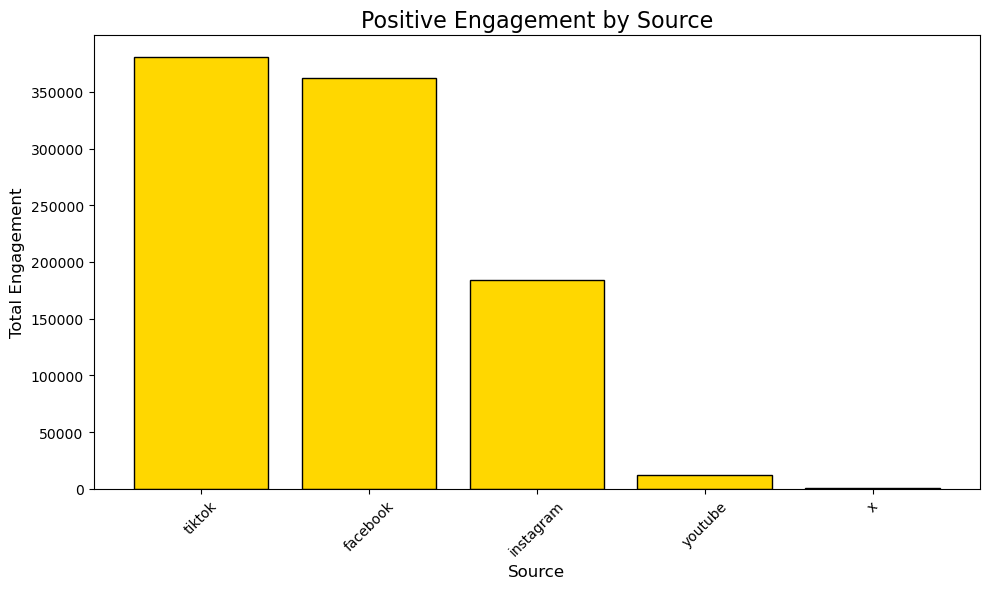

In [22]:
# Aggregate the positive sentiment data to calculate total engagement by source
positive_engagement_by_source = positive_sentiment_data.groupby('Source')['Engagement'].sum().reset_index()

# Sort by engagement for better visualization
positive_engagement_by_source = positive_engagement_by_source.sort_values(by='Engagement', ascending=False)

# Plot a bar chart to visualize positive engagement by source
plt.figure(figsize=(10, 6))
plt.bar(positive_engagement_by_source['Source'], positive_engagement_by_source['Engagement'], color='#FFD700', edgecolor='black')

# Add titles and labels
plt.title('Positive Engagement by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# # Group data by Category and Sentiment to analyze engagement
engagement_by_sentiment = filtered_data.groupby(['Category', 'Sentiment'])['Engagement'].sum().reset_index()

# Pivot the data for easier analysis
engagement_pivot = engagement_by_sentiment.pivot(index='Category', columns='Sentiment', values='Engagement').fillna(0)

# Rename columns for clarity
engagement_pivot.columns.name = None  # Remove multi-index column name
engagement_pivot = engagement_pivot.rename(columns={
    'Positive': 'Positive Engagement',
    'Negative': 'Negative Engagement',
    'Neutral': 'Neutral Engagement'
})

# Sort data by total engagement for readability
engagement_pivot['Total Engagement'] = engagement_pivot.sum(axis=1)
engagement_pivot = engagement_pivot.sort_values(by='Total Engagement', ascending=False)

# Output the resulting DataFrame
engagement_pivot

,Negative Engagement,Neutral Engagement,Positive Engagement,Total Engagement
Category,,,,
The Pizza Company,278.0,477188.0,480836.0,958302.0
Pizza Hut,2655.0,421168.0,354671.0,778494.0
Domino,0.0,15147.0,105011.0,120158.0


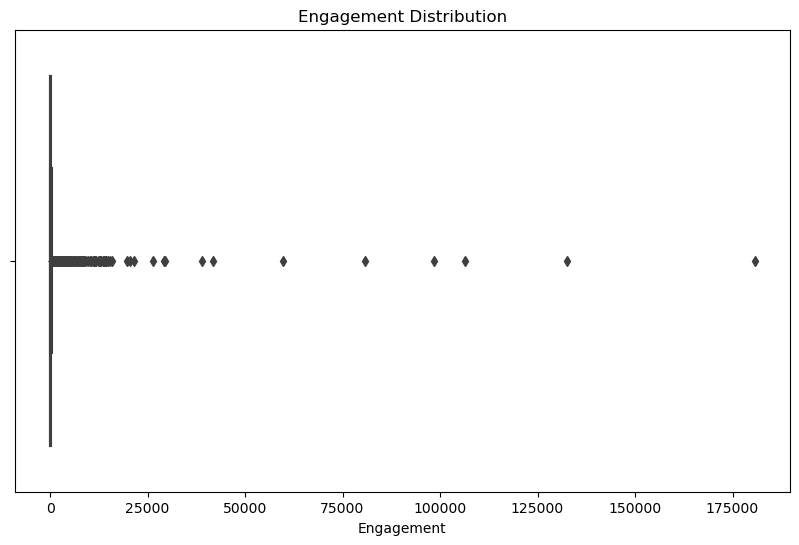

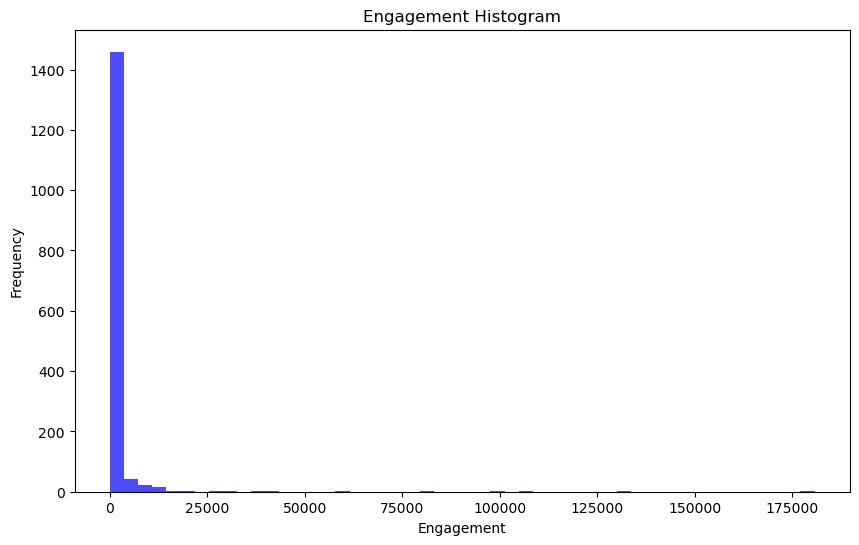

In [28]:
# Box plot to visualize engagement distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Engagement')
plt.title('Engagement Distribution')
plt.xlabel('Engagement')
plt.show()

# Histogram to see overall engagement spread
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Engagement'], bins=50, color='blue', alpha=0.7)
plt.title('Engagement Histogram')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()

In [29]:
print(filtered_data['Engagement'].describe())

count      1555.000000
mean       1194.182637
std        7719.783919
min           0.000000
25%           3.000000
50%          22.000000
75%         230.000000
max      180670.000000
Name: Engagement, dtype: float64


High Engagement Outliers (Top 5%):
               Category    Source  Engagement  Follower count  \
68    The Pizza Company  facebook        8540         1938802   
117   The Pizza Company  facebook        5014         7042689   
161   The Pizza Company  facebook       14353         1860651   
174   The Pizza Company  facebook       10340         4076339   
180   The Pizza Company  facebook        9144          890980   
...                 ...       ...         ...             ...   
2110          Pizza Hut  facebook        6701          700084   
2112          Pizza Hut  facebook        8276         4074905   
2192             Domino    tiktok       11159         2900000   
2225             Domino    tiktok       13531          967200   
2267          Pizza Hut    tiktok       12879         2400000   

                                                Message  
68    อร่อยจัดทุกเหลี่ยม พิซซ่าหน้าเหลี่ยม So Square...  
117    ทุกหน้าราคาเดียว! . . พิซซ่าหน้าเหลี่ยม เพียง...  
161    เดอ

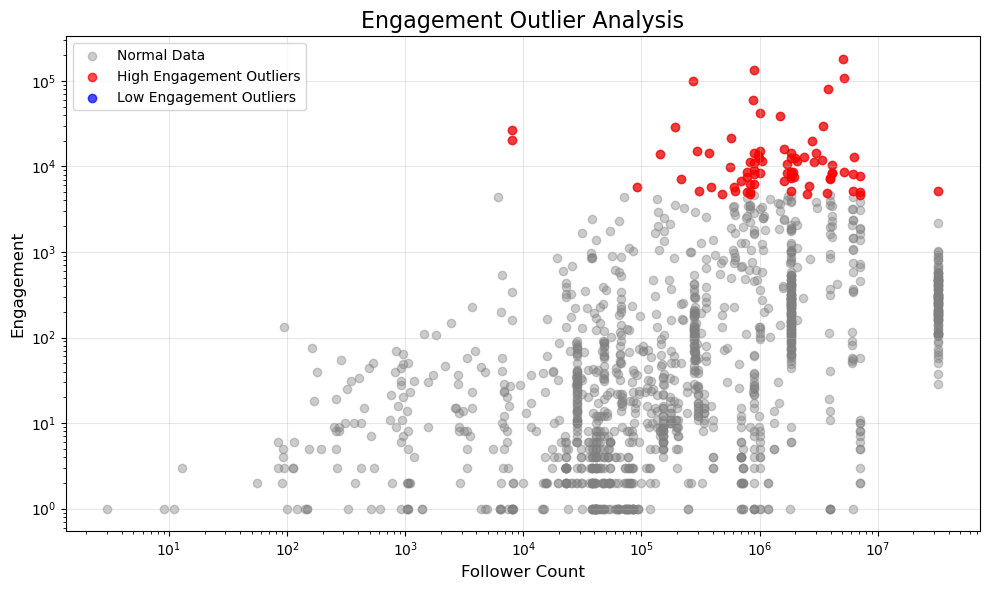

In [30]:
# Define thresholds for outlier detection based on Engagement
# High outliers: Top 5% engagement
high_engagement_threshold = filtered_data['Engagement'].quantile(0.95)

# Low outliers: Bottom 5% engagement
low_engagement_threshold = filtered_data['Engagement'].quantile(0.05)

# Filter outliers
high_engagement_outliers = filtered_data[filtered_data['Engagement'] > high_engagement_threshold]
low_engagement_outliers = filtered_data[filtered_data['Engagement'] < low_engagement_threshold]

# Display summary of high and low engagement outliers
print(f"High Engagement Outliers (Top 5%):")
print(high_engagement_outliers[['Category', 'Source', 'Engagement', 'Follower count', 'Message']])

print(f"\nLow Engagement Outliers (Bottom 5%):")
print(low_engagement_outliers[['Category', 'Source', 'Engagement', 'Follower count', 'Message']])

# Visualization: Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(filtered_data['Follower count'], filtered_data['Engagement'], alpha=0.4, label='Normal Data', color='gray')

# Highlight high engagement outliers
plt.scatter(
    high_engagement_outliers['Follower count'], 
    high_engagement_outliers['Engagement'], 
    color='red', label='High Engagement Outliers', alpha=0.7
)

# Highlight low engagement outliers
plt.scatter(
    low_engagement_outliers['Follower count'], 
    low_engagement_outliers['Engagement'], 
    color='blue', label='Low Engagement Outliers', alpha=0.7
)

# Add titles and labels
plt.title('Engagement Outlier Analysis', fontsize=16)
plt.xlabel('Follower Count', fontsize=12)
plt.ylabel('Engagement', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()

In [84]:
# Define function to categorize follower size
def follower_size_group(follower_count):
    if follower_count < 10000:
        return 'Small'
    elif 10000 <= follower_count <= 100000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column
filtered_data['Follower Size'] = filtered_data['Follower count'].apply(follower_size_group)

# Display a sample of the data with the new column
filtered_data[['Follower count', 'Follower Size']].head()

,Follower count,Follower Size
3,6135489,Large
4,276318,Large
5,32564296,Large
6,1860490,Large
7,7042397,Large


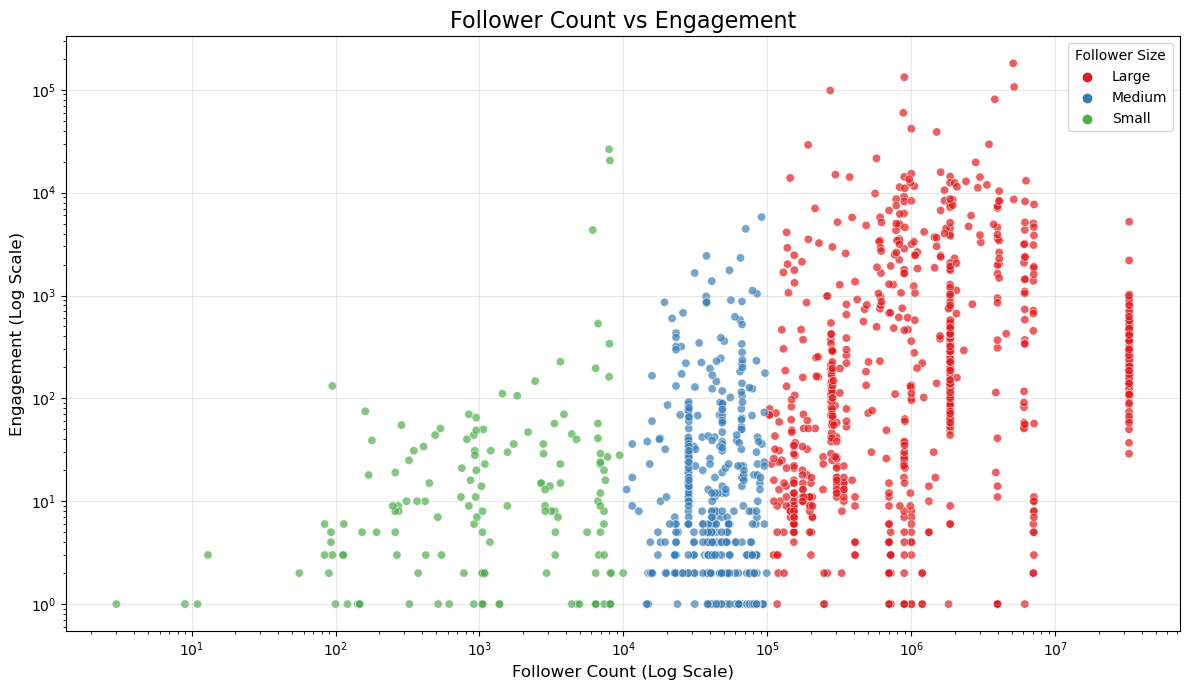

In [85]:
# Scatter plot: Follower Count vs Engagement by Size Group
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Follower count', 
    y='Engagement', 
    hue='Follower Size', 
    data=filtered_data, 
    palette='Set1', 
    alpha=0.7
)
plt.title('Follower Count vs Engagement', fontsize=16)
plt.xlabel('Follower Count (Log Scale)', fontsize=12)
plt.ylabel('Engagement (Log Scale)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Follower Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Engagement Efficiency by Category:
            Category  Engagement Efficiency
2  The Pizza Company               0.006248
1          Pizza Hut               0.006073
0             Domino               0.005001


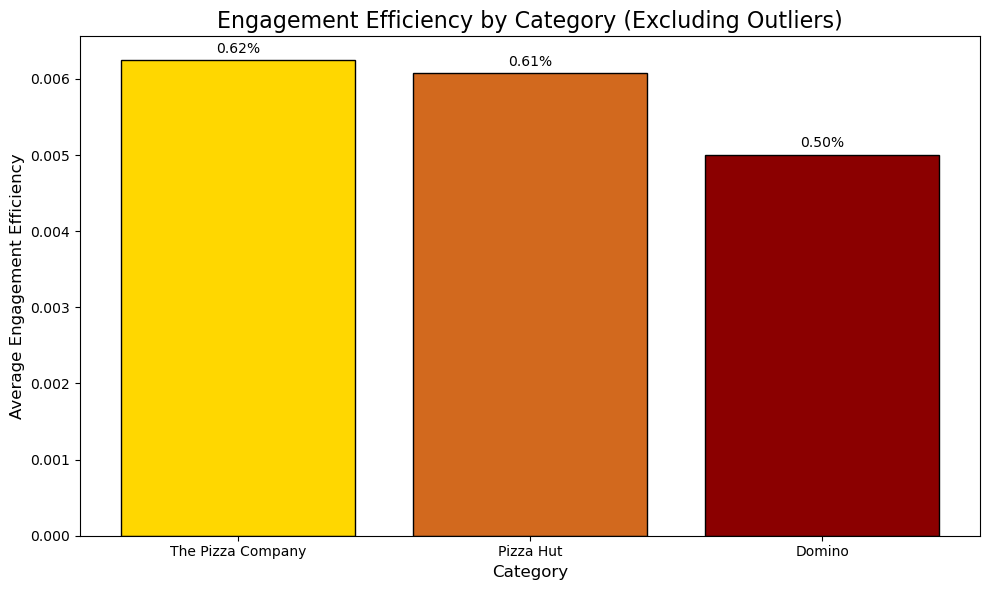

In [32]:
# Remove rows with non-finite values in Engagement or Follower count
pizza = pizza[(pizza['Engagement'].notnull()) & (pizza['Follower count'].notnull())]
pizza = pizza[(pizza['Engagement'] > 0) & (pizza['Follower count'] > 0)]

# Define thresholds for outlier detection based on Engagement
high_engagement_threshold = pizza['Engagement'].quantile(0.95)  # Top 5%
low_engagement_threshold = pizza['Engagement'].quantile(0.05)   # Bottom 5%

# Filter out high and low engagement outliers
filtered_normal_data = pizza[
    (pizza['Engagement'] <= high_engagement_threshold) &
    (pizza['Engagement'] >= low_engagement_threshold)
].copy()  # Create a copy to avoid SettingWithCopyWarning

# Calculate engagement efficiency (engagement per follower count)
filtered_normal_data['Engagement Efficiency'] = (
    filtered_normal_data['Engagement'] / filtered_normal_data['Follower count']
)

# Group by category and calculate average efficiency
engagement_efficiency_by_category = filtered_normal_data.groupby('Category')['Engagement Efficiency'].mean().reset_index()

# Sort by efficiency in descending order
engagement_efficiency_by_category = engagement_efficiency_by_category.sort_values(by='Engagement Efficiency', ascending=False)

# Display the results
print("Engagement Efficiency by Category:")
print(engagement_efficiency_by_category)

# Visualization: Engagement Efficiency by Category
plt.figure(figsize=(10, 6))
plt.bar(
    engagement_efficiency_by_category['Category'], 
    engagement_efficiency_by_category['Engagement Efficiency'], 
    color=['#FFD700', '#D2691E', '#8B0000'], 
    edgecolor='black'
)

# Add titles and labels
plt.title('Engagement Efficiency by Category (Excluding Outliers)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Engagement Efficiency', fontsize=12)

# Show values on top of bars
for index, value in enumerate(engagement_efficiency_by_category['Engagement Efficiency']):
    plt.text(index, value + 0.0001, f"{value:.2%}", ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

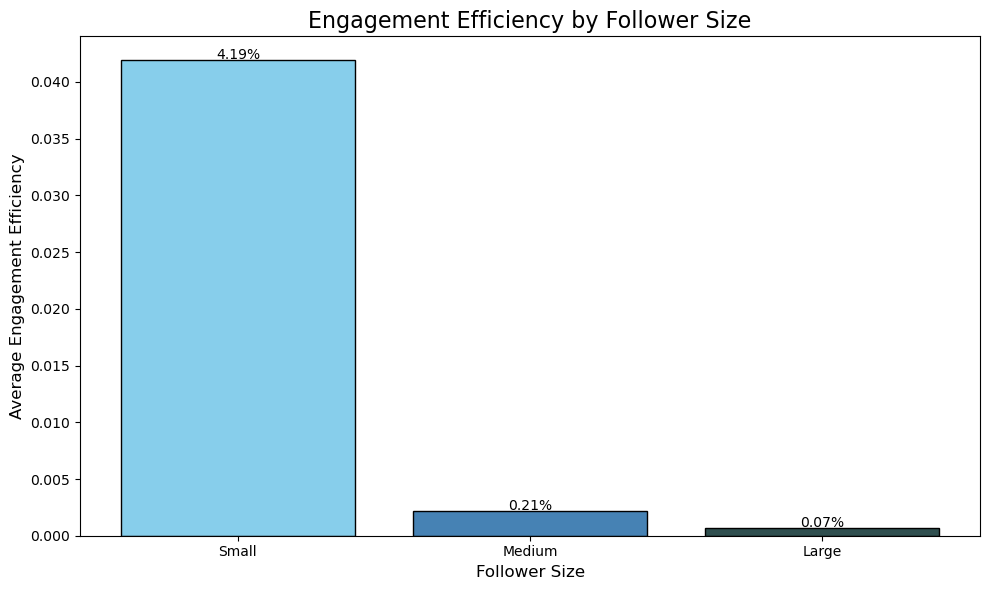

ModuleNotFoundError: No module named 'ace_tools'

In [87]:
# Define follower size groups (if not already done)
def follower_size_group(follower_count):
    if follower_count < 10000:
        return 'Small'
    elif 10000 <= follower_count <= 100000:
        return 'Medium'
    else:
        return 'Large'

filtered_normal_data['Follower Size'] = filtered_normal_data['Follower count'].apply(follower_size_group)

# Group by Follower Size and calculate average engagement efficiency
efficiency_by_follower_size = (
    filtered_normal_data.groupby('Follower Size')['Engagement Efficiency']
    .mean()
    .reset_index()
    .sort_values(by='Engagement Efficiency', ascending=False)
)

# Visualization: Engagement Efficiency by Follower Size
plt.figure(figsize=(10, 6))
plt.bar(
    efficiency_by_follower_size['Follower Size'], 
    efficiency_by_follower_size['Engagement Efficiency'], 
    color=['#87CEEB', '#4682B4', '#2F4F4F'], 
    edgecolor='black'
)

# Add titles and labels
plt.title('Engagement Efficiency by Follower Size', fontsize=16)
plt.xlabel('Follower Size', fontsize=12)
plt.ylabel('Average Engagement Efficiency', fontsize=12)

# Show values on top of bars
for index, value in enumerate(efficiency_by_follower_size['Engagement Efficiency']):
    plt.text(index, value + 0.0001, f"{value:.2%}", ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Display the engagement efficiency data by follower size
import ace_tools as tools
tools.display_dataframe_to_user(
    name="Engagement Efficiency by Follower Size", 
    dataframe=efficiency_by_follower_size
)

Engagement Efficiency by Source:
      Source  Engagement Efficiency
3          x               0.051542
2     tiktok               0.017486
4    youtube               0.004349
1  instagram               0.004343
0   facebook               0.000707


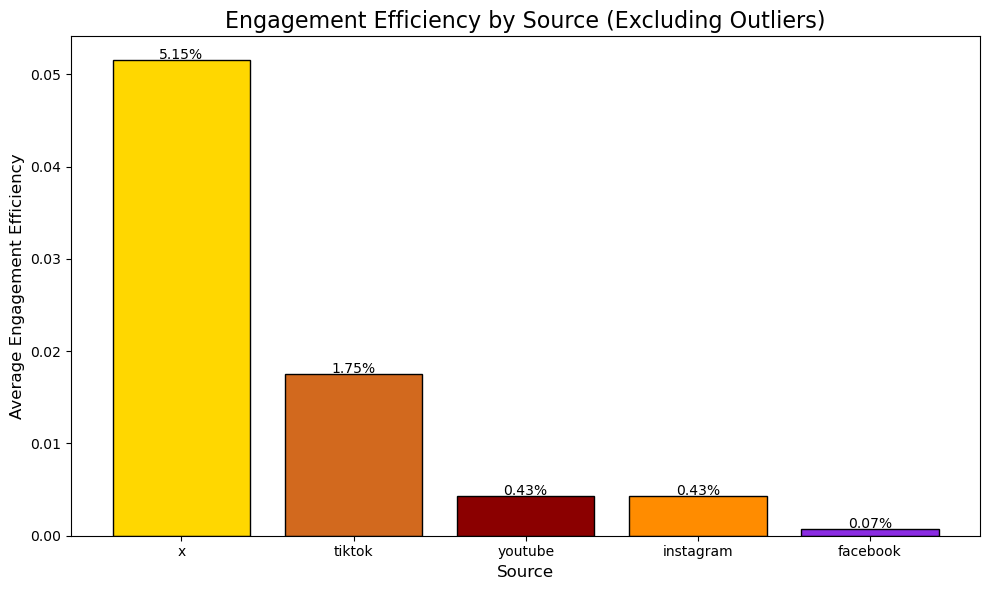

In [33]:
# Group by source and calculate average engagement efficiency
engagement_efficiency_by_source = filtered_normal_data.groupby('Source')['Engagement Efficiency'].mean().reset_index()

# Sort by efficiency in descending order
engagement_efficiency_by_source = engagement_efficiency_by_source.sort_values(by='Engagement Efficiency', ascending=False)

# Display the results
print("Engagement Efficiency by Source:")
print(engagement_efficiency_by_source)

# Visualization: Engagement Efficiency by Source
plt.figure(figsize=(10, 6))
plt.bar(
    engagement_efficiency_by_source['Source'], 
    engagement_efficiency_by_source['Engagement Efficiency'], 
    color=['#FFD700', '#D2691E', '#8B0000', '#FF8C00', '#8A2BE2'], 
    edgecolor='black'
)

# Add titles and labels
plt.title('Engagement Efficiency by Source (Excluding Outliers)', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Average Engagement Efficiency', fontsize=12)

# Show values on top of bars
for index, value in enumerate(engagement_efficiency_by_source['Engagement Efficiency']):
    plt.text(index, value + 0.0001, f"{value:.2%}", ha='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [34]:
# Define thresholds for outlier detection based on Engagement
high_engagement_threshold = pizza['Engagement'].quantile(0.95)  # Top 5%
low_engagement_threshold = pizza['Engagement'].quantile(0.05)   # Bottom 5%

# Filter out high and low engagement outliers
filtered_pizza = pizza[
    (pizza['Engagement'] <= high_engagement_threshold) &
    (pizza['Engagement'] >= low_engagement_threshold)
].copy()

# Ensure the 'post date' column is in datetime format
filtered_pizza['post date'] = pd.to_datetime(filtered_pizza['post date'])

# Extract the hour from the post date for analysis
filtered_pizza['Hour'] = filtered_pizza['post date'].dt.hour

# Group by hour and calculate total engagement
engagement_by_hour = filtered_pizza.groupby('Hour')['Engagement'].sum().reset_index()

# Identify the peak engagement hour
peak_hour = engagement_by_hour.loc[engagement_by_hour['Engagement'].idxmax()]

# Display the peak engagement hour and total engagement
print(f"Peak Engagement Time (Without Outliers): {peak_hour['Hour']}:00 with {peak_hour['Engagement']} total engagements.")

# Optional: Display the engagement by hour for context
print("\nEngagement by Hour of the Day (Without Outliers):")
print(engagement_by_hour)

Peak Engagement Time (Without Outliers): 0:00 with 447673 total engagements.

Engagement by Hour of the Day (Without Outliers):
   Hour  Engagement
0     0      447673


In [35]:
pizza['post date'] = pd.to_datetime(pizza['post date'])

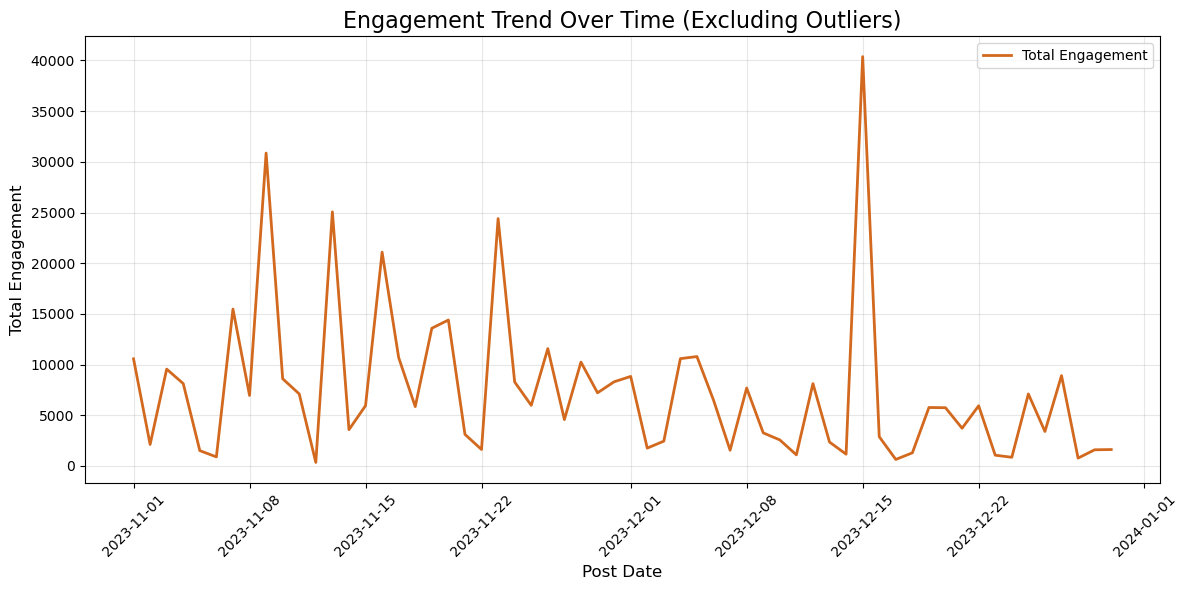

In [37]:
# Define thresholds for outlier detection based on Engagement
high_engagement_threshold = pizza['Engagement'].quantile(0.95)  # Top 5%
low_engagement_threshold = pizza['Engagement'].quantile(0.05)   # Bottom 5%

# Filter out high and low engagement outliers
filtered_pizza = pizza[
    (pizza['Engagement'] <= high_engagement_threshold) &
    (pizza['Engagement'] >= low_engagement_threshold)
].copy()

# Group by post date and calculate total engagement
engagement_trend = filtered_pizza.groupby('post date')['Engagement'].sum().reset_index()
engagement_trend.columns = ['Post Date', 'Total Engagement']

# Plot engagement trend over time
plt.figure(figsize=(12, 6))
plt.plot(
    engagement_trend['Post Date'], 
    engagement_trend['Total Engagement'], 
    marker='', 
    color='#D2691E', 
    linewidth=2, 
    label='Total Engagement'
)

# Add chart elements
plt.title('Engagement Trend Over Time (Excluding Outliers)', fontsize=16)
plt.xlabel('Post Date', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

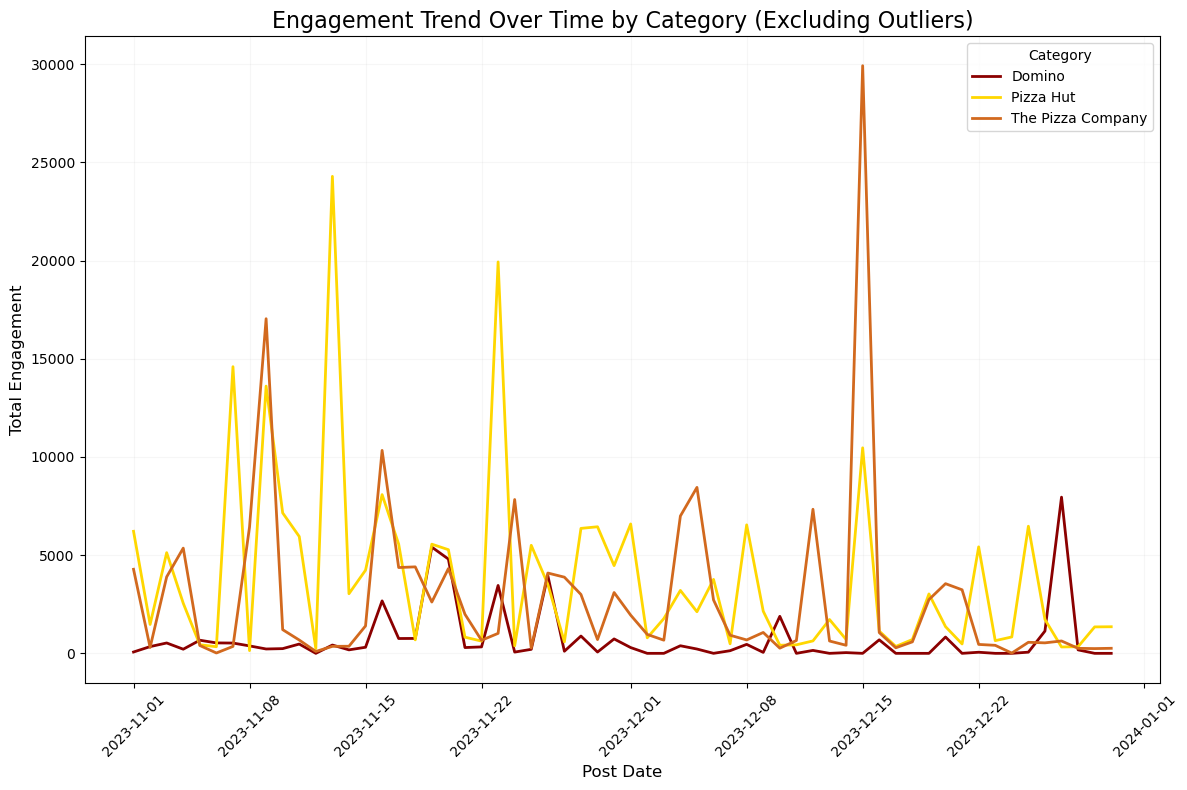

In [45]:
# Define a color map for categories
category_colors = {
    'Pizza Hut': '#FFD700',       # Gold
    'The Pizza Company': '#D2691E',  # Chocolate
    'Domino': '#8B0000'          # Dark Red
}

# Plot engagement trends by category
plt.figure(figsize=(12, 8))
for category in engagement_trend_pivot.columns:
    plt.plot(
        engagement_trend_pivot.index, 
        engagement_trend_pivot[category], 
        marker='', 
        color=category_colors.get(category, '#000000'),  # Default to black if category not in color map
        linewidth=2, 
        label=category
    )

# Add chart elements
plt.title('Engagement Trend Over Time by Category (Excluding Outliers)', fontsize=16)
plt.xlabel('Post Date', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.1)
plt.legend(title='Category', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

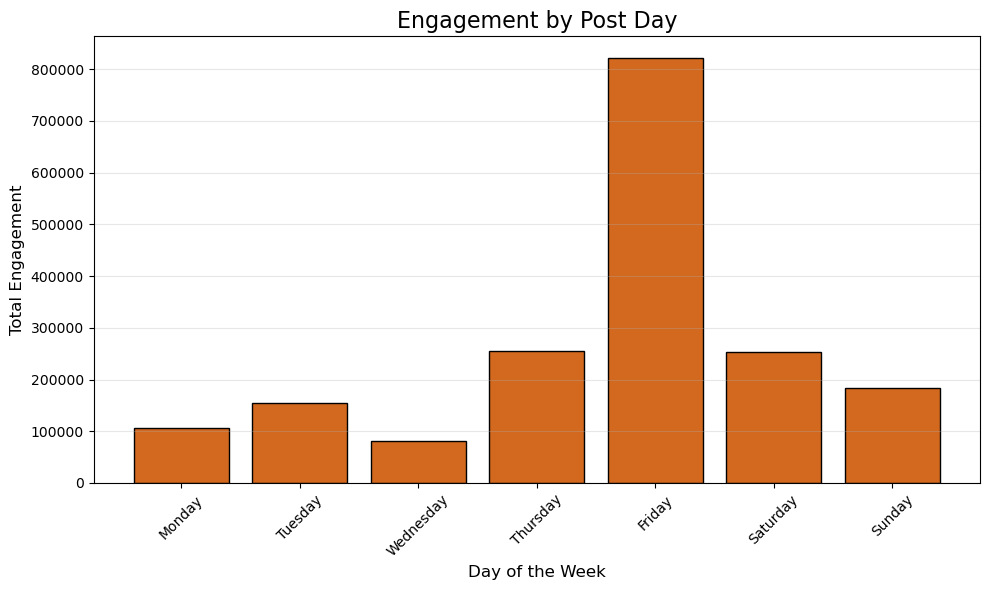

In [51]:
# Extract the day of the week from the post date
pizza['Post Day'] = pizza['post date'].dt.day_name()

# Group by day of the week and calculate total engagement
engagement_by_day = pizza.groupby('Post Day')['Engagement'].sum().reset_index()

# Sort the days of the week in calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_day['Post Day'] = pd.Categorical(engagement_by_day['Post Day'], categories=day_order, ordered=True)
engagement_by_day = engagement_by_day.sort_values('Post Day')

# Plot engagement by post day
plt.figure(figsize=(10, 6))
plt.bar(
    engagement_by_day['Post Day'], 
    engagement_by_day['Engagement'], 
    color='#D2691E', 
    edgecolor='black'
)

# Add chart elements
plt.title('Engagement by Post Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Display the chart
plt.tight_layout()
plt.show()

In [54]:
pizza['Post Time'] = pd.to_datetime(pizza['post time'], format='%H:%M:%S').dt.hour

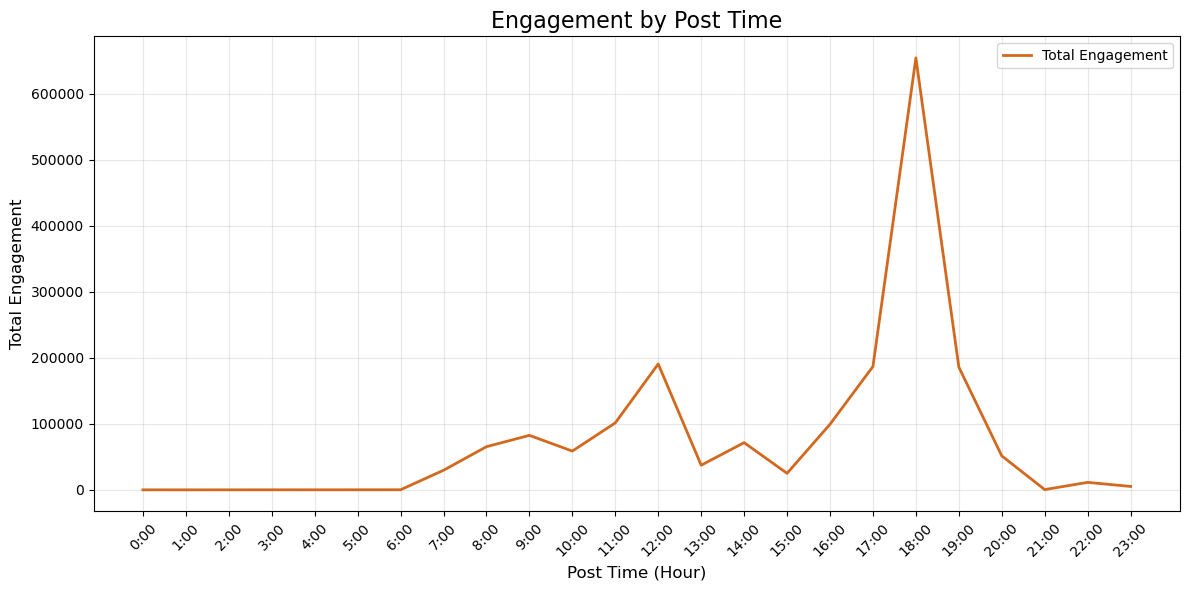

In [56]:
# Group by 'Post Time' and calculate total engagement
engagement_by_time = pizza.groupby('Post Time')['Engagement'].sum().reset_index()

# Plot engagement by post time as a line chart
plt.figure(figsize=(12, 6))
plt.plot(
    engagement_by_time['Post Time'], 
    engagement_by_time['Engagement'], 
    marker='', 
    color='#D2691E', 
    linewidth=2, 
    label='Total Engagement'
)

# Add chart elements
plt.title('Engagement by Post Time', fontsize=16)
plt.xlabel('Post Time (Hour)', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(0, 24)], rotation=45, fontsize=10)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()


In [46]:
# Analyze keyword impact on engagement using the 'Image labels' column

# Split the 'Image labels' column into individual keywords
pizza['Keywords'] = pizza['Image labels'].str.split(',')

# Explode the keywords into separate rows for analysis
keywords_exploded = pizza.explode('Keywords')

# Strip whitespace from keywords for consistency
keywords_exploded['Keywords'] = keywords_exploded['Keywords'].str.strip()

# Group by keywords and calculate total and average engagement
keyword_impact = keywords_exploded.groupby('Keywords')['Engagement'].agg(['sum', 'mean', 'count']).reset_index()
keyword_impact.columns = ['Keyword', 'Total Engagement', 'Average Engagement', 'Keyword Count']

# Sort by total engagement to identify top-performing keywords
keyword_impact = keyword_impact.sort_values(by='Total Engagement', ascending=False)

# Display the top keywords
print("Keyword Impact on Engagement:")
print(keyword_impact.head(10))  # Display the top 10 keywords

Keyword Impact on Engagement:
         Keyword  Total Engagement  Average Engagement  Keyword Count
54          food           1156701         1558.896226            742
48     fast food           1099502         1796.571895            612
117        snack            987589         1084.071350            911
96        person            983063         1743.019504            564
31      clothing            978762         1789.327239            547
68    human face            880045         2650.737952            332
2    baked goods            644400         1805.042017            357
146        woman            406286         1302.198718            312
69    human hair            400081         2222.672222            180
98         pizza            368140         2330.000000            158


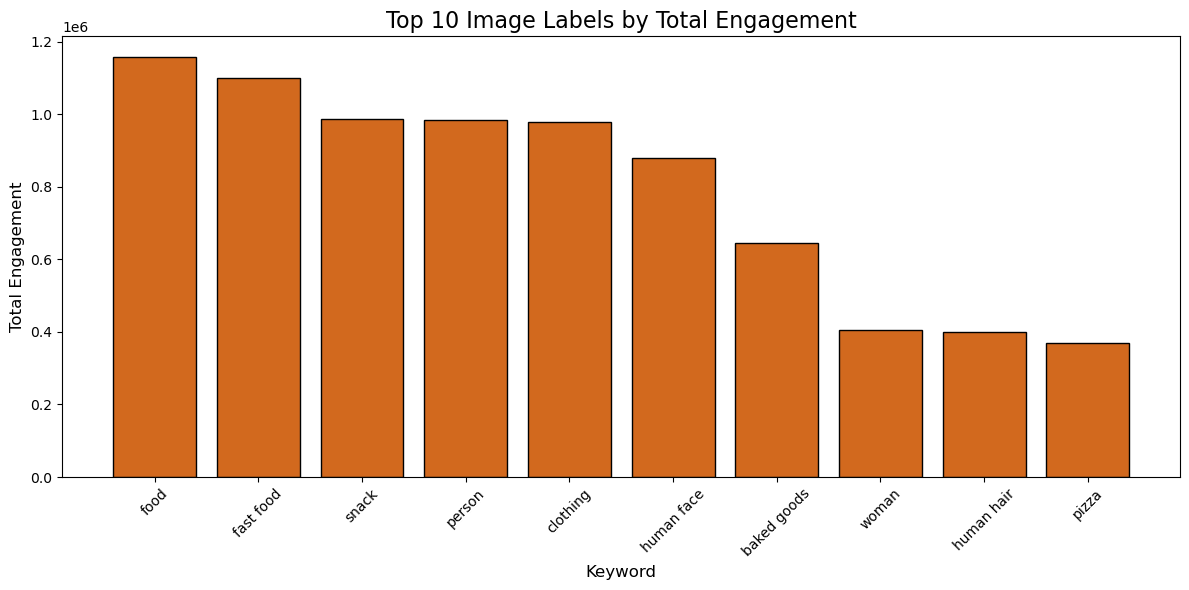

In [48]:
# Take the top 10 keywords by total engagement for visualization
top_keywords = keyword_impact.head(10)

# Plot a bar chart for keyword impact
plt.figure(figsize=(12, 6))
plt.bar(
    top_keywords['Keyword'], 
    top_keywords['Total Engagement'], 
    color='#D2691E', 
    edgecolor='black'
)

# Add titles and labels
plt.title('Top 10 Image Labels by Total Engagement', fontsize=16)
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

In [57]:
sentiment_distribution = pizza['Sentiment'].value_counts(normalize=True)
print(sentiment_distribution)

Positive    0.627924
Neutral     0.366228
Negative    0.005848
Name: Sentiment, dtype: float64


In [58]:
sentiment_engagement = pizza.groupby('Sentiment')['Engagement'].agg(['sum', 'mean']).reset_index()
print(sentiment_engagement)

  Sentiment     sum         mean
0  Negative    2933   366.625000
1   Neutral  913503  1823.359281
2  Positive  940518  1094.898719


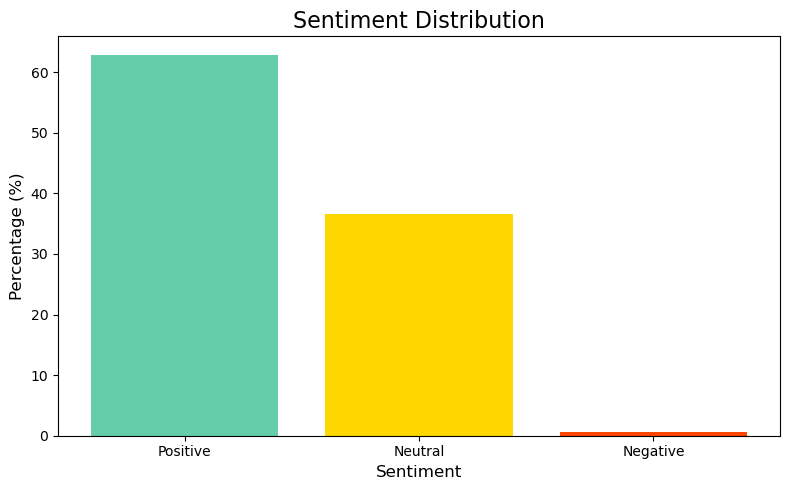

In [59]:
# Sentiment Distribution
sentiment_distribution = pizza['Sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['#66CDAA', '#FFD700', '#FF4500'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.tight_layout()
plt.show()

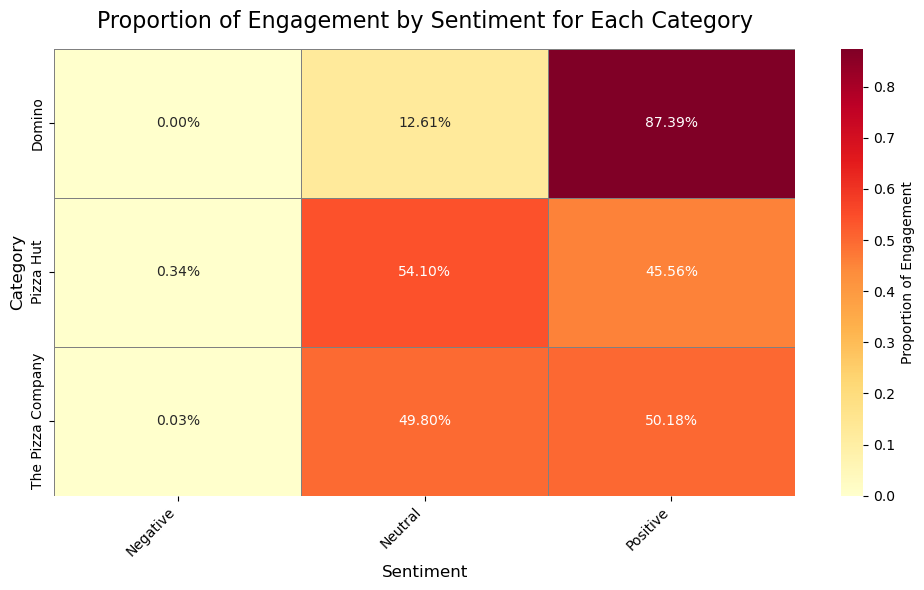

In [67]:
# Calculate the proportion of engagement by sentiment for each category
category_sentiment_proportion = pizza.groupby(['Category', 'Sentiment'])['Engagement'].sum().unstack().fillna(0)

# Normalize the data to calculate proportions
category_sentiment_proportion = category_sentiment_proportion.div(category_sentiment_proportion.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    category_sentiment_proportion,
    annot=True,  # Show the data values
    fmt=".2%",   # Display as percentages
    cmap="YlOrRd",  # Color palette similar to the image
    linewidths=0.5,  # Add grid lines between cells
    linecolor='gray',  # Set grid line color
    cbar_kws={'label': 'Proportion of Engagement'}  # Label for color bar
)

# Customize the plot
plt.title('Proportion of Engagement by Sentiment for Each Category', fontsize=16, pad=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the chart
plt.show()

In [92]:
domino_positive_content = pizza[
    (pizza['Category'] == 'Pizza Hut') & (pizza['Sentiment'] == 'Negative')
][['Message', 'Engagement']].sort_values(by='Engagement', ascending=False)
print(domino_positive_content.head(10))  # Display top 10 messages

                                               Message  Engagement
102  ถ้าพลาดโปรนี้คือร้องไห้!! Pizza Hut โปรใหม่ ดี...        2623
820  เม้าท์กับคิ้ม EP.นี้ฉ่ำเวอร์ กับ 2 ตัวมัม หม่ำ...          32


In [93]:
domino_positive_content = pizza[
    (pizza['Category'] == 'Domino') & (pizza['Sentiment'] == 'Negative')
][['Message', 'Engagement']].sort_values(by='Engagement', ascending=False)
print(domino_positive_content.head(10))  # Display top 10 messages

Empty DataFrame
Columns: [Message, Engagement]
Index: []


In [94]:
domino_positive_efficiency = pizza[
    (pizza['Category'] == 'Domino') & (pizza['Sentiment'] == 'Positive')
].copy()
domino_positive_efficiency['Efficiency'] = (
    domino_positive_efficiency['Engagement'] / domino_positive_efficiency['Follower count']
)
print(domino_positive_efficiency[['Source', 'Efficiency']].sort_values(by='Efficiency', ascending=False))

         Source  Efficiency
1974  instagram    0.079982
1775     tiktok    0.025941
571    facebook    0.012657
2190  instagram    0.012220
981    facebook    0.010480
...         ...         ...
766    facebook    0.000089
1080    youtube    0.000068
1073   facebook    0.000042
1468   facebook    0.000042
2057    youtube    0.000023

[103 rows x 2 columns]


<Axes: title={'center': 'Engagement Over Time for Positive Sentiment'}, xlabel='post date'>

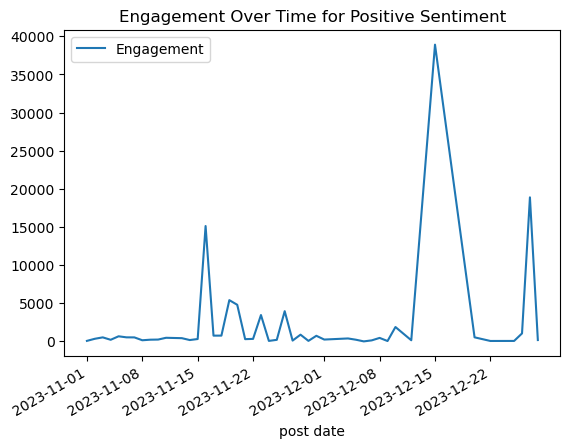

In [89]:
domino_positive_trends = pizza[
    (pizza['Category'] == 'Domino') & (pizza['Sentiment'] == 'Positive')
][['post date', 'Engagement']].groupby('post date').sum()
domino_positive_trends.plot(kind='line', title='Engagement Over Time for Positive Sentiment')

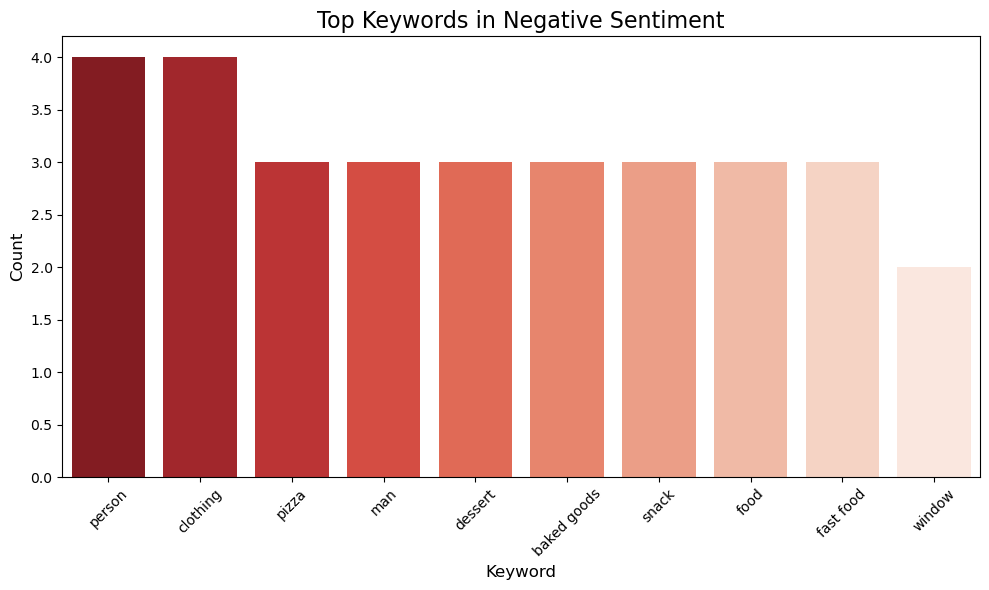

In [69]:
# Analyze Top Keywords in Negative Sentiment
negative_sentiment_data = pizza[pizza['Sentiment'] == 'Negative']
negative_keywords = negative_sentiment_data['Image labels'].str.split(',').explode().str.strip()
negative_keyword_analysis = negative_keywords.value_counts().head(10).reset_index()
negative_keyword_analysis.columns = ['Keyword', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=negative_keyword_analysis, x='Keyword', y='Count', palette='Reds_r')
plt.title('Top Keywords in Negative Sentiment', fontsize=16)
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

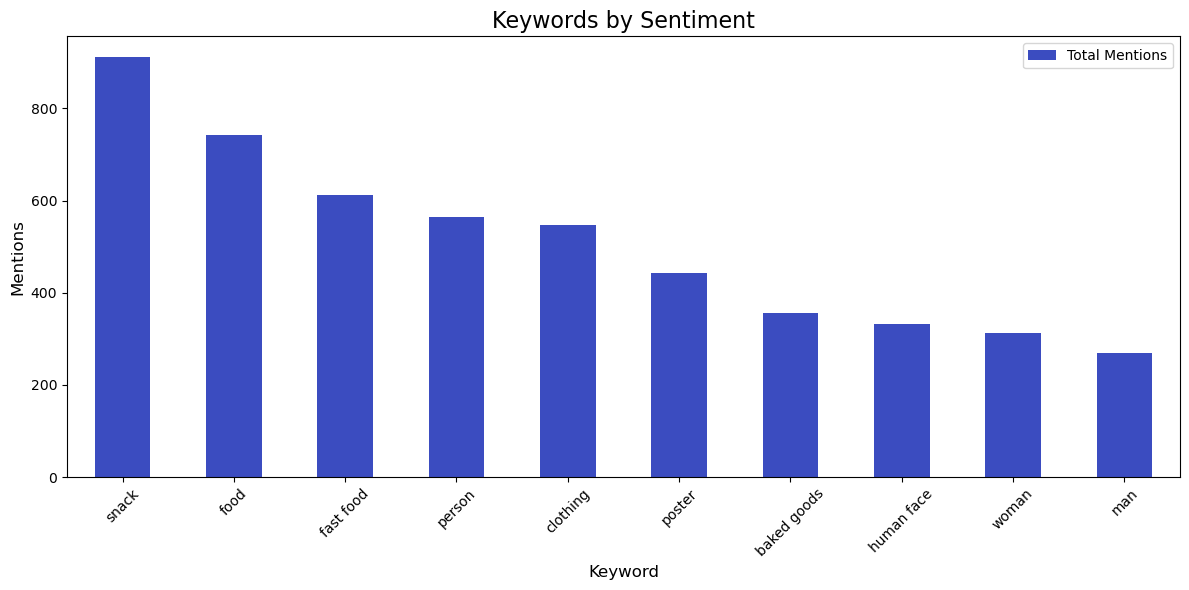

In [70]:
# Keywords by Sentiment
keywords_sentiment = pizza[['Sentiment', 'Image labels']].copy()
keywords_sentiment['Keywords'] = pizza['Image labels'].str.split(',')
keywords_sentiment = keywords_sentiment.explode('Keywords')
keywords_sentiment['Keywords'] = keywords_sentiment['Keywords'].str.strip()

# Group keywords by sentiment
keywords_by_sentiment = keywords_sentiment.groupby(['Keywords', 'Sentiment']).size().unstack(fill_value=0)
keywords_by_sentiment_top = keywords_by_sentiment.sum(axis=1).nlargest(10).reset_index()
keywords_by_sentiment_top.columns = ['Keyword', 'Total Mentions']

plt.figure(figsize=(12, 8))
keywords_by_sentiment_top.set_index('Keyword').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Keywords by Sentiment', fontsize=16)
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

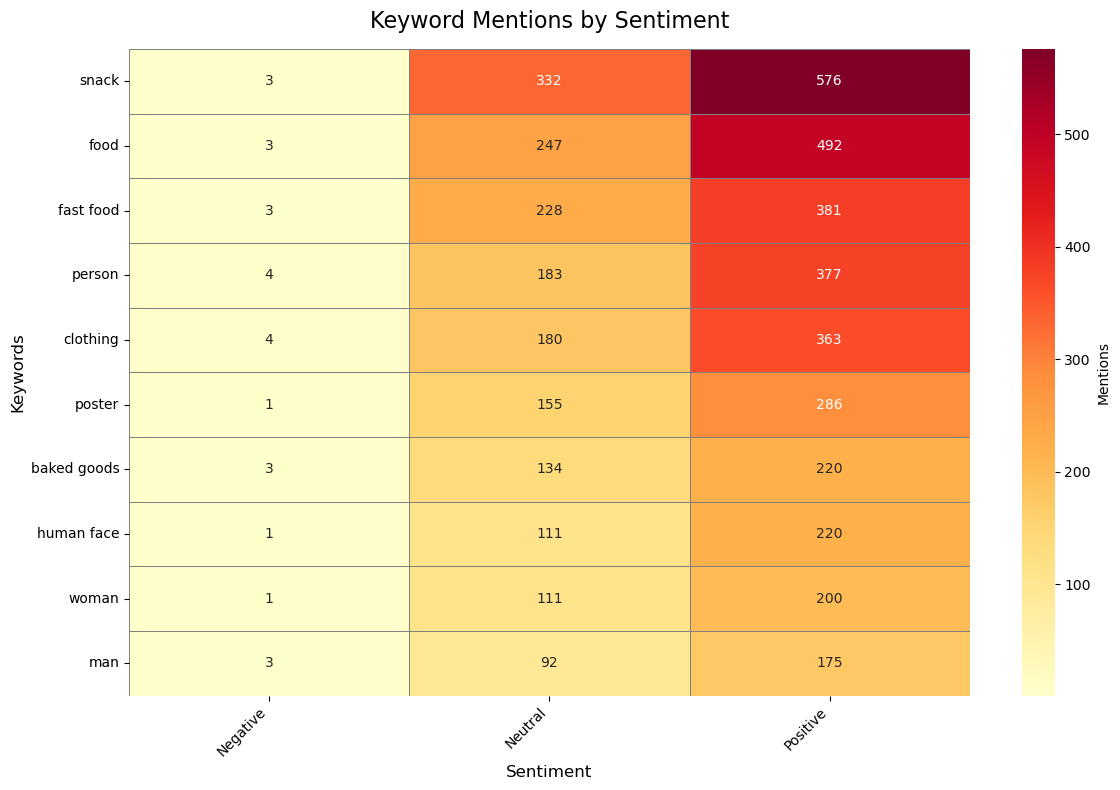

In [72]:
# Keywords by Sentiment
keywords_sentiment = pizza[['Sentiment', 'Image labels']].copy()
keywords_sentiment['Keywords'] = pizza['Image labels'].str.split(',')
keywords_sentiment = keywords_sentiment.explode('Keywords')
keywords_sentiment['Keywords'] = keywords_sentiment['Keywords'].str.strip()

# Group keywords by sentiment
keywords_by_sentiment = keywords_sentiment.groupby(['Keywords', 'Sentiment']).size().unstack(fill_value=0)

# Find the top 10 keywords across all sentiments
top_keywords = keywords_by_sentiment.sum(axis=1).nlargest(10).index
keywords_by_sentiment_top = keywords_by_sentiment.loc[top_keywords]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    keywords_by_sentiment_top,
    annot=True,         # Show keyword mention counts
    fmt="d",            # Format as integers
    cmap="YlOrRd",      # Use a diverging color map
    linewidths=0.5,     # Add grid lines
    linecolor="gray",   # Grid line color
    cbar_kws={'label': 'Mentions'}  # Color bar label
)

# Customize the chart
plt.title('Keyword Mentions by Sentiment', fontsize=16, pad=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Keywords', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

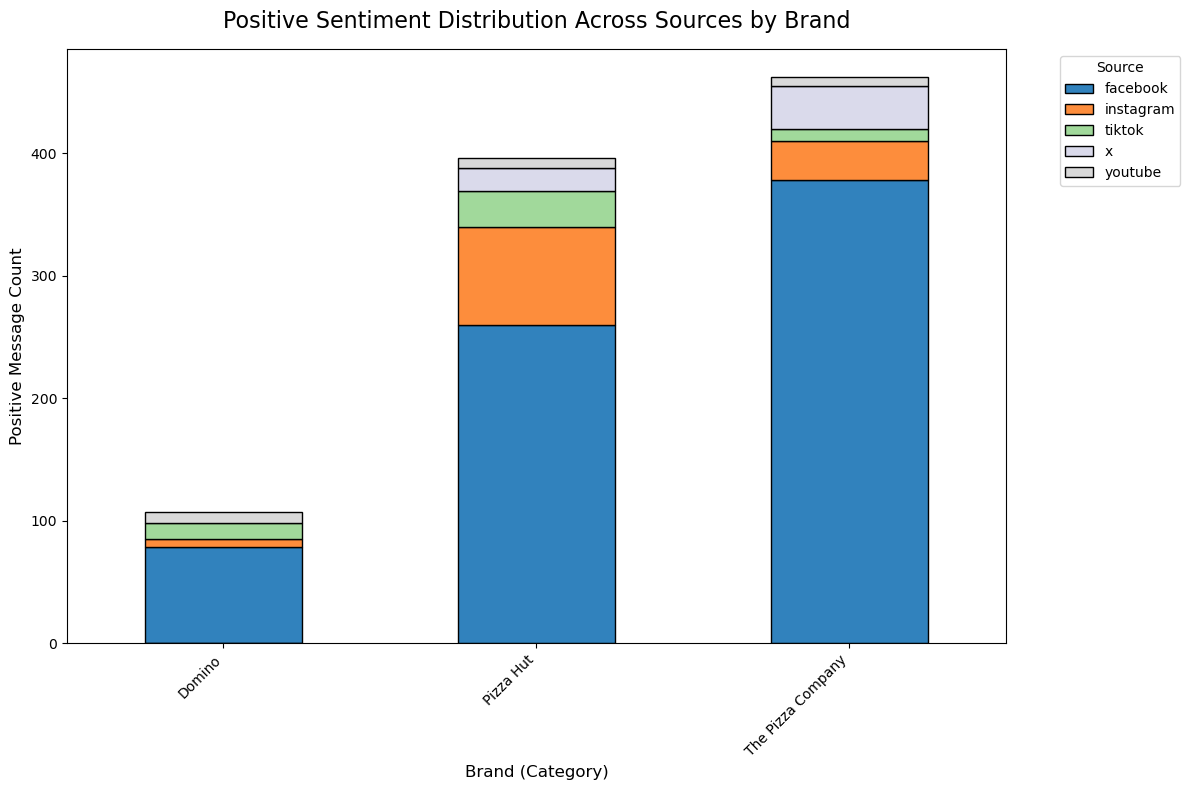

In [77]:
# Filter the data to only include positive sentiment
positive_sentiment_data = filtered_data[filtered_data['Sentiment'] == 'Positive']

# Group the positive sentiment data by 'Category' (brand) and 'Source') to count messages
positive_sentiment_analysis = positive_sentiment_data.groupby(['Category', 'Source'])['Message'].count().reset_index()

# Rename columns for clarity
positive_sentiment_analysis.columns = ['Brand', 'Source', 'Positive Message Count']

# Pivot the data for visualization
positive_sentiment_pivot = positive_sentiment_analysis.pivot(index='Brand', columns='Source', values='Positive Message Count').fillna(0)

# Plot the stacked bar chart
positive_sentiment_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab20c',
    edgecolor='black'
)

# Customize the chart
plt.title('Positive Sentiment Distribution Across Sources by Brand', fontsize=16, pad=15)
plt.xlabel('Brand (Category)', fontsize=12)
plt.ylabel('Positive Message Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

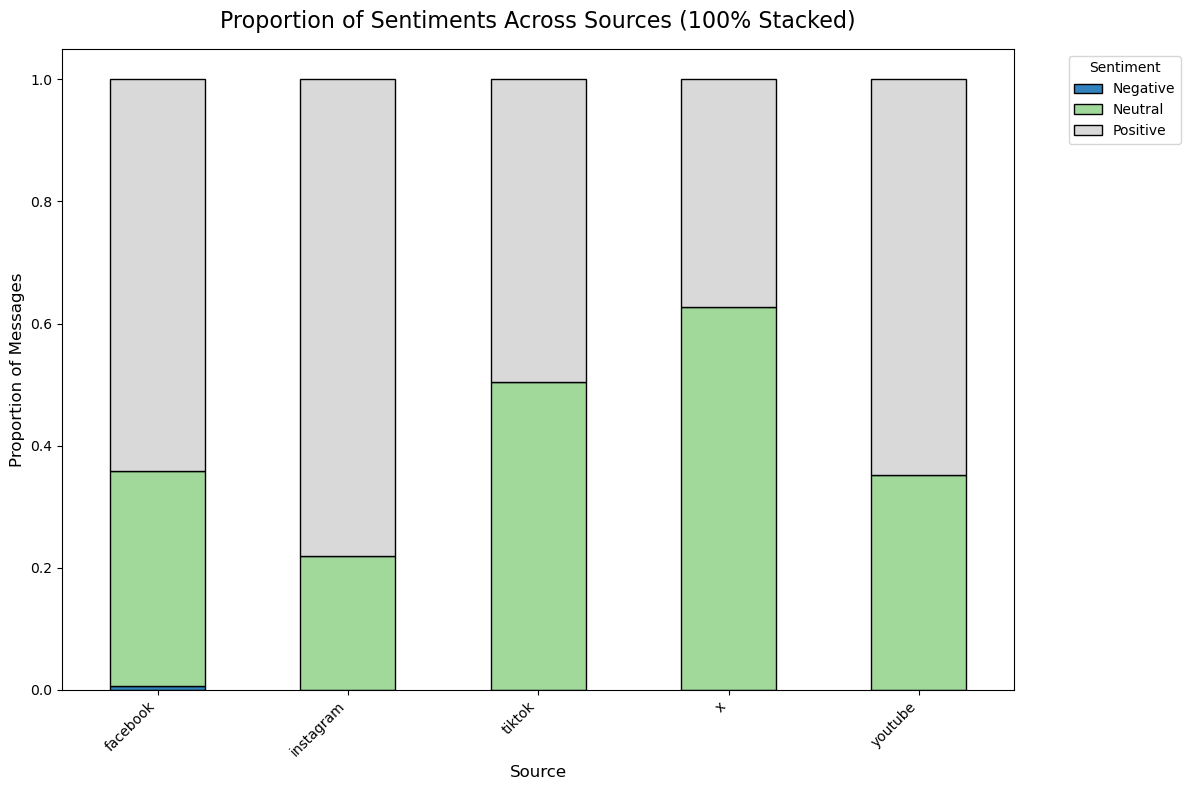

In [79]:
# Group the data by 'Source' and 'Sentiment' to count messages
source_sentiment_analysis = filtered_data.groupby(['Source', 'Sentiment'])['Message'].count().reset_index()

# Rename columns for clarity
source_sentiment_analysis.columns = ['Source', 'Sentiment', 'Message Count']

# Pivot the data for visualization
source_sentiment_pivot = source_sentiment_analysis.pivot(index='Source', columns='Sentiment', values='Message Count').fillna(0)

# Normalize the data to represent proportions (100% stacked bar chart)
source_sentiment_pivot_normalized = source_sentiment_pivot.div(source_sentiment_pivot.sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
source_sentiment_pivot_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab20c',
    edgecolor='black'
)

# Customize the chart
plt.title('Proportion of Sentiments Across Sources (100% Stacked)', fontsize=16, pad=15)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Proportion of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()